<a href="https://colab.research.google.com/github/mariatefranca/aiplanet_deep_learning/blob/main/MTF_Deep_Learning_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

The anthropometric analysis of the human face is an essential study for performing craniofacial plastic and reconstructive surgeries. Facial anthropometrics are affected by various factors such as age, gender, ethnicity, socioeconomic status, environment, and region.  
Plastic surgeons who undertake the repair and reconstruction of facial deformities find the anatomical dimensions of the facial structures useful for their surgeries. These dimensions are a result of the Physical or Facial appearance of an individual. Along with factors like culture, personality, ethnic background, age; eye appearance and symmetry contributes majorly to the facial appearance or aesthetics. 


# Objective

The objective is to build a model to scan the image of an eye of a patient and find if the gender of the patient is male or female.

# About the Dataset

The dataset that contains eye pictures of males and females. The zip file named ‘eye_gender_data.zip’ contains four files:

   train - contains all the images that are to be used for training your model.   
  Training_set.csv - this csv file has contains the labels for the training images   
  test - contains 9000+ images. For these images you are required to make predictions   
  Testing_set.csv - this is the order of the predictions for each image that is to be submitted on the platform. Make sure the predictions you submit are with their image’s filename in the same order as given in this file.   

  sample_submission.csv- this is the sample submission file for the data sprint  
 

Download the images

We can use GoogleDriveDownloader form google_drive_downloader library in Python to download the shared files from the shared Google drive link: https://drive.google.com/file/d/1f7uslI-ZHidriQFZR966_aILjlkgDN76/view?usp=sharing

The file id in the above link is: 1f7uslI-ZHidriQFZR966_aILjlkgDN76

# Importing libraries

In [ ]:
import pandas as pd                                     # Data analysis and manipulation tool
import numpy as np                                      # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf                                 # Deep Learning Tool
import os                                               # OS module in Python provides a way of using operating system dependent functionality
import cv2                                              # Library for image processing
from sklearn.model_selection import train_test_split    # For splitting the data into train and validation set
from tensorflow.keras.layers import Dense, BatchNormalization
from sklearn.metrics import f1_score
from datetime import datetime 

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Jan 20 13:31:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0    54W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Loading and preparing training data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
start_time = datetime.now()

labels = pd.read_csv("/content/drive/MyDrive/eye_gender_data/Training_set.csv")   # Loading the labels
file_paths = [[fname, '/content/drive/MyDrive/eye_gender_data/train/' + fname] for fname in labels['filename']]
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
train_data = pd.merge(images, labels, how = 'inner', on = 'filename')

data = []     # Initializing an empty numpy array
image_size = 100      # SEtting 100 as image size
for i in range(len(train_data)):
  img_array = cv2.imread(train_data['filepaths'][i], cv2.IMREAD_GRAYSCALE)   # Converting the image to gray scale
  new_img_array = cv2.resize(img_array, (image_size, image_size))      # Resizing the image array
  data.append([new_img_array, train_data['label'][i]])

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 1:13:52.888052


In [ ]:
eyes_data = data.copy()

In [ ]:
type(eyes_data) #Checking the type of 'eye_data'

list

In [ ]:
len(eyes_data[0][0]) # Checking the lenght of array of the image

100

In [ ]:
eyes_data[0]

[array([[188, 188, 189, ..., 176, 175, 175],
        [189, 189, 188, ..., 174, 173, 172],
        [190, 189, 188, ..., 168, 167, 167],
        ...,
        [133, 137, 144, ..., 168, 167, 166],
        [134, 138, 145, ..., 165, 164, 163],
        [135, 139, 146, ..., 163, 162, 162]], dtype=uint8), 'male']

In [ ]:
eyes_data = pd.DataFrame(eyes_data)

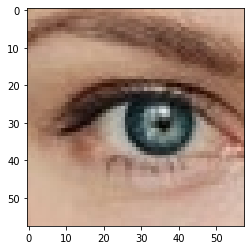

In [ ]:
import matplotlib.pyplot as plt # For data visualization 
# Displaying an image from the file
img_bgr = cv2.imread('/content/drive/MyDrive/eye_gender_data/train/Image_2.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# Data Pre-processing

Bringing all the images in the same shape and size, also converting them to their pixel values because all machine learning or deep learning models accepts only the numerical data. Also it is required to convert all the labels from categorical to numerical values.


Converting the categorical output data to a numerical data   

male = 0
female = 1

---



In [ ]:
# Creating a new column to transform the categorival output in numerical values
eyes_data[2] = eyes_data[1].apply(lambda x: 1 if x == 'female' else 0)
eyes_data

,0,1,2
0,"[[188, 188, 189, 189, 190, 186, 180, 182, 185,...",male,0
1,"[[167, 169, 173, 177, 181, 179, 178, 175, 175,...",female,1
2,"[[181, 179, 177, 176, 175, 175, 175, 175, 173,...",female,1
3,"[[98, 97, 97, 97, 98, 104, 108, 110, 111, 112,...",female,1
4,"[[177, 180, 180, 173, 174, 172, 168, 171, 170,...",male,0
...,...,...,...
9215,"[[197, 197, 197, 197, 197, 196, 196, 195, 195,...",male,0
9216,"[[158, 159, 164, 168, 169, 170, 169, 165, 165,...",male,0
9217,"[[189, 190, 192, 182, 176, 178, 177, 175, 162,...",male,0
9218,"[[143, 142, 140, 139, 137, 135, 137, 139, 138,...",male,0


In [ ]:
eyes_data[2].value_counts() # Counting the number of 0 and 1 values

0    5058
1    4162
Name: 2, dtype: int64

In [ ]:
eyes_data[1].value_counts() # Counting the number of 'male' and 'female' values

male      5058
female    4162
Name: 1, dtype: int64

In [ ]:
# Separating the data into imput and output variables
images = eyes_data.drop([1,2], axis = 1)
labels_num = eyes_data[2]

In [ ]:
images, images.shape, images[0][0].shape

(                                                      0
 0     [[188, 188, 189, 189, 190, 186, 180, 182, 185,...
 1     [[167, 169, 173, 177, 181, 179, 178, 175, 175,...
 2     [[181, 179, 177, 176, 175, 175, 175, 175, 173,...
 3     [[98, 97, 97, 97, 98, 104, 108, 110, 111, 112,...
 4     [[177, 180, 180, 173, 174, 172, 168, 171, 170,...
 ...                                                 ...
 9215  [[197, 197, 197, 197, 197, 196, 196, 195, 195,...
 9216  [[158, 159, 164, 168, 169, 170, 169, 165, 165,...
 9217  [[189, 190, 192, 182, 176, 178, 177, 175, 162,...
 9218  [[143, 142, 140, 139, 137, 135, 137, 139, 138,...
 9219  [[225, 225, 225, 226, 227, 227, 225, 223, 222,...
 
 [9220 rows x 1 columns], (9220, 1), (100, 100))

In [ ]:
labels_num, labels_num.shape

(0       0
 1       1
 2       1
 3       1
 4       0
        ..
 9215    0
 9216    0
 9217    0
 9218    0
 9219    1
 Name: 2, Length: 9220, dtype: int64, (9220,))

In [ ]:
y = np.array(labels_num)

In [ ]:
y, y.shape # Checking the shape of y

(array([0, 1, 1, ..., 0, 0, 1]), (9220,))

In [ ]:
# Normalizing the imput data
images_norm = images/255
images_norm

,0
0,"[[0.7372549019607844, 0.7372549019607844, 0.74..."
1,"[[0.6549019607843137, 0.6627450980392157, 0.67..."
2,"[[0.7098039215686275, 0.7019607843137254, 0.69..."
3,"[[0.3843137254901961, 0.3803921568627451, 0.38..."
4,"[[0.6941176470588235, 0.7058823529411765, 0.70..."
...,...
9215,"[[0.7725490196078432, 0.7725490196078432, 0.77..."
9216,"[[0.6196078431372549, 0.6235294117647059, 0.64..."
9217,"[[0.7411764705882353, 0.7450980392156863, 0.75..."
9218,"[[0.5607843137254902, 0.5568627450980392, 0.54..."


In [ ]:
X = np.zeros((len(images_norm[0]), images_norm[0][0].shape[0], images_norm[0][0].shape[1]))

for i, img in enumerate(images_norm[0]):
    X[i, : , :] = img

In [ ]:
X.shape

(9220, 100, 100)

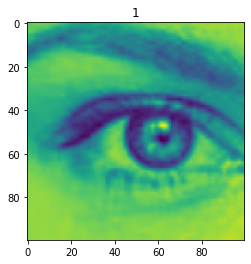

In [ ]:
# Displaying an image after dataset type conversion
plt.imshow(X[1])
plt.title(label=y[1])
plt.show()

In [ ]:
X = X.reshape(9220, 100, 100, 1)
X.shape

(9220, 100, 100, 1)

In [ ]:
# Splitting the data into Train and Validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(7376, 100, 100, 1)


# Building Model & Hyperparameter tuning

## Building Model

In [ ]:
# Defining input shape
INPUT_SHAPE = (100, 100, 1)

# Defining sequential model
model = tf.keras.models.Sequential() 
tf.keras.layers.BatchNormalization() # Applying batch normalization to decrease importance of initial weights and speeds the training
# Defining conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), # Filter is the number of filters, Kernel_size is the size of filters
                                 strides=(1, 1), # Stride is the number of pixels to move horizontally or vertically
                                activation='relu', # Rectified linear unit is the sctivation function that decides, whether a neuron should be activated or not
                                 padding='same', input_shape=INPUT_SHAPE)) # Padding Valid reduces the image after convolving due to loss of edges, Same maintain the image size
model.add(BatchNormalization()) # Applying batch normalization to decrease importance of initial weights and speeds the training
model.add(tf.keras.layers.Conv2D(filters=164, kernel_size=(5, 5), strides=(1, 1), 
                                activation='relu', padding='same', input_shape=INPUT_SHAPE))
model.add(BatchNormalization()) # Applying batch normalization to decrease importance of initial weights and speeds the training
# Defining a poooling layer to reduce the number of parameters for provide faster training and to prevent overfitting
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(BatchNormalization()) # Applying batch normalization to decrease importance of initial weights and speeds the training
# Defining conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), 
                                activation='relu', padding='same', input_shape=INPUT_SHAPE))
# Applying batch normalization to speed the training and decreasing the importance of initial weights ( as it regularizes the model, applying drop out together produce better results )
model.add(BatchNormalization()) # Applying batch normalization to decrease importance of initial weights and speeds the training
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), strides=(1, 1), 
                                activation='relu', padding='same', input_shape=INPUT_SHAPE))
model.add(BatchNormalization()) # Applying batch normalization to decrease importance of initial weights and speeds the training
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(BatchNormalization()) # Applying batch normalization to decrease importance of initial weights and speeds the training
# Adding a flatten layer
model.add(tf.keras.layers.Flatten())
model.add(BatchNormalization()) # Applying batch normalization to decrease importance of initial weights and speeds the training
# Adding dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu')) 
model.add(BatchNormalization()) # Applying batch normalization to decrease importance of initial weights and speeds the training
model.add(tf.keras.layers.Dropout(rate=0.3)) # Applying dropout of 30% of neurons
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(BatchNormalization()) # Applying batch normalization to decrease importance of initial weights and speeds the training
model.add(tf.keras.layers.Dropout(rate=0.2)) # applying dropout of 20% of neurons

# Adding output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
# Model layers viasulization
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 batch_normalization_1 (Batc  (None, 100, 100, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 164)     131364    
                                                                 
 batch_normalization_2 (Batc  (None, 100, 100, 164)    656       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 164)      0         
 )                                                               
                                                        

## Training Model

In [ ]:
# Compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # Adam as a faster optimization algorithm than Stochastic Gradient Descent and setting the default value for the learning rate 
EPOCHS = 100 # 100 Epochs is the number of loops that through the training dataset

model_0 = tf.keras.models.clone_model(model)
model_0.compile(optimizer= optimizer , 
              loss='BinaryCrossentropy', # Using binary cross-entropy (for a binary calssification problem) as the loss function to measure the degree of dissimilarity of obtained result to the target value)
              metrics=['accuracy'])

# Using Early Stopping for stop training before it starts to overfitting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                               patience=2,  # Number of epochs with no improvement after which training will be stopped
                                               restore_best_weights=True,
                                               verbose=1) # Verbose=1 will show you an animated progress bar of epochs

es_monitor = model_0.fit(X_train, y_train,
                    batch_size=100, # Setting 100 as the batch size (number of samples used to estimate model error in an epoch), the default value is 32
                    callbacks=[es_callback], 
                    validation_data=(X_val, y_val), 
                    epochs=EPOCHS,
                    verbose=1)

Epoch 1/100
74/74 [==============================] - 18s 82ms/step - loss: 0.4839 - accuracy: 0.7882 - val_loss: 1.2405 - val_accuracy: 0.5580
Epoch 2/100
74/74 [==============================] - 4s 56ms/step - loss: 0.3014 - accuracy: 0.8754 - val_loss: 2.3109 - val_accuracy: 0.5580
Epoch 3/100
74/74 [==============================] - 4s 57ms/step - loss: 0.2358 - accuracy: 0.9029 - val_loss: 3.3248 - val_accuracy: 0.5580
Epoch 3: early stopping


## Hyperparameter Tunning

The hyperparameters tunning strategies optimized in this notebook were:   
* Learning Rate   
* Batch Size  


Reducing Learning Rate

In [ ]:
# Compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) # Adam is a faster optimization algorithm than Stochastic Gradient Descent and reducing the learning rate value 
EPOCHS = 100 # 100 Epochs is the number of loops that through the training dataset

model_1 = tf.keras.models.clone_model(model)
model_1.compile(optimizer= optimizer , 
              loss='BinaryCrossentropy', # Using binary cross-entropy (for a binary calssification problem) as the loss function to measure the degree of dissimilarity of obtained result to the target value)
              metrics=['accuracy'])

# Using Early Stopping for stop training before it starts to overfitting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                               patience=2,  # Number of epochs with no improvement after which training will be stopped
                                               restore_best_weights=True,
                                               verbose=1) # Verbose=1 will exhibitan animated progress bar of epochs

es_monitor_1 = model_1.fit(X_train, y_train,
                    batch_size=100, # Setting 100 as the batch size (number of samples used to estimate model error in an epoch), the default value is 32
                    callbacks=[es_callback], 
                    validation_data=(X_val, y_val), 
                    epochs=EPOCHS,
                    verbose=1)

Epoch 1/100
74/74 [==============================] - 6s 61ms/step - loss: 0.4460 - accuracy: 0.8053 - val_loss: 0.6788 - val_accuracy: 0.5580
Epoch 2/100
74/74 [==============================] - 4s 56ms/step - loss: 0.2760 - accuracy: 0.8846 - val_loss: 0.6824 - val_accuracy: 0.4702
Epoch 3/100
74/74 [==============================] - 4s 57ms/step - loss: 0.2065 - accuracy: 0.9157 - val_loss: 0.6125 - val_accuracy: 0.6741
Epoch 4/100
74/74 [==============================] - 4s 57ms/step - loss: 0.1695 - accuracy: 0.9300 - val_loss: 0.5378 - val_accuracy: 0.8221
Epoch 5/100
74/74 [==============================] - 4s 57ms/step - loss: 0.1203 - accuracy: 0.9546 - val_loss: 0.4811 - val_accuracy: 0.7701
Epoch 6/100
74/74 [==============================] - 4s 57ms/step - loss: 0.0903 - accuracy: 0.9679 - val_loss: 0.4570 - val_accuracy: 0.7880
Epoch 7/100
74/74 [==============================] - 4s 57ms/step - loss: 0.0700 - accuracy: 0.9774 - val_loss: 0.3939 - val_accuracy: 0.8308
Epoch 

In [ ]:
# compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001) # Adam is a faster optimization algorithm than Stochastic Gradient Descent and reducing the learning rate value 
EPOCHS = 100 # 100 Epochs is the number of loops that through the training dataset

model_2 = tf.keras.models.clone_model(model)
model_2.compile(optimizer= optimizer , 
              loss='BinaryCrossentropy', # Using binary cross-entropy (for a binary calssification problem) as the loss function to measure the degree of dissimilarity of obtained result to the target value)
              metrics=['accuracy'])

# Using Early Stopping for stop training before it starts to overfitting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                               patience=2,  # Number of epochs with no improvement after which training will be stopped
                                               restore_best_weights=True,
                                               verbose=1) # Verbose=1 exhibits an animated progress bar of epochs

es_monitor_2 = model_2.fit(X_train, y_train,
                    batch_size=100, # Setting 100 as the batch size (number of samples used to estimate model error in an epoch), the default value is 32
                    callbacks=[es_callback], 
                    validation_data=(X_val, y_val), 
                    epochs=EPOCHS,
                    verbose=1)

Epoch 1/100
74/74 [==============================] - 6s 61ms/step - loss: 0.6007 - accuracy: 0.7062 - val_loss: 0.6829 - val_accuracy: 0.5580
Epoch 2/100
74/74 [==============================] - 4s 57ms/step - loss: 0.3750 - accuracy: 0.8355 - val_loss: 0.6813 - val_accuracy: 0.5580
Epoch 3/100
74/74 [==============================] - 4s 57ms/step - loss: 0.2997 - accuracy: 0.8739 - val_loss: 0.6618 - val_accuracy: 0.5662
Epoch 4/100
74/74 [==============================] - 4s 57ms/step - loss: 0.2549 - accuracy: 0.8915 - val_loss: 0.6268 - val_accuracy: 0.6768
Epoch 5/100
74/74 [==============================] - 4s 57ms/step - loss: 0.2226 - accuracy: 0.9102 - val_loss: 0.5635 - val_accuracy: 0.7218
Epoch 6/100
74/74 [==============================] - 4s 56ms/step - loss: 0.1940 - accuracy: 0.9229 - val_loss: 0.6123 - val_accuracy: 0.6350
Epoch 7/100
74/74 [==============================] - 4s 57ms/step - loss: 0.1654 - accuracy: 0.9379 - val_loss: 0.6291 - val_accuracy: 0.6697
Epoch 

Reducing batch size

In [ ]:
# Compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001) # Adam as a faster optimization algorithm than Stochastic Gradient Descent and using a reduced value for the learning rate
EPOCHS = 100 # 100 Epochs is the number of loops that through the training dataset

model_3 = tf.keras.models.clone_model(model)
model_3.compile(optimizer= optimizer , 
              loss='BinaryCrossentropy', # Using binary cross-entropy (for a binary calssification problem) as the loss function to measure the degree of dissimilarity of obtained result to the target value)
              metrics=['accuracy'])

# Using Early Stopping for stop training before it starts to overfitting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                               patience=2,  # Number of epochs with no improvement after which training will be stopped
                                               restore_best_weights=True,
                                               verbose=1) # verbose=1 will show you an animated progress bar of epochs

es_monitor_3 = model_3.fit(X_train, y_train,
                    batch_size=50, # Reducing the batch size in a half (50)
                    callbacks=[es_callback], 
                    validation_data=(X_val, y_val), 
                    epochs=EPOCHS,
                    verbose=1)

Epoch 1/100
148/148 [==============================] - 7s 35ms/step - loss: 0.5363 - accuracy: 0.7424 - val_loss: 0.7291 - val_accuracy: 0.5580
Epoch 2/100
148/148 [==============================] - 4s 29ms/step - loss: 0.3403 - accuracy: 0.8496 - val_loss: 0.6930 - val_accuracy: 0.5586
Epoch 3/100
148/148 [==============================] - 4s 29ms/step - loss: 0.2725 - accuracy: 0.8861 - val_loss: 0.6131 - val_accuracy: 0.6535
Epoch 4/100
148/148 [==============================] - 4s 29ms/step - loss: 0.2219 - accuracy: 0.9128 - val_loss: 0.3578 - val_accuracy: 0.8400
Epoch 5/100
148/148 [==============================] - 4s 29ms/step - loss: 0.1886 - accuracy: 0.9245 - val_loss: 0.2440 - val_accuracy: 0.8943
Epoch 6/100
148/148 [==============================] - 4s 29ms/step - loss: 0.1661 - accuracy: 0.9360 - val_loss: 0.2261 - val_accuracy: 0.9013
Epoch 7/100
148/148 [==============================] - 4s 29ms/step - loss: 0.1384 - accuracy: 0.9520 - val_loss: 0.2089 - val_accuracy:

In [ ]:
# Compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) # Adam as a faster optimization algorithm than Stochastic Gradient Descent and using the reduced value for the learning rate
EPOCHS = 100 # 100 Epochs is the number of loops that through the training dataset

model_4 = tf.keras.models.clone_model(model)
model_4.compile(optimizer= optimizer , 
              loss='BinaryCrossentropy', # Using binary cross-entropy (for a binary calssification problem) as the loss function to measure the degree of dissimilarity of obtained result to the target value)
              metrics=['accuracy'])

#Using Early Stopping for stop training before it starts to overfitting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                               patience=2,  # number of epochs with no improvement after which training will be stopped
                                               restore_best_weights=True,
                                               verbose=1) # verbose=1 will show you an animated progress bar of epochs

es_monitor_4 = model_4.fit(X_train, y_train,
                    batch_size=50, # Reducing the batch size in a half (50)
                    callbacks=[es_callback], 
                    validation_data=(X_val, y_val), 
                    epochs=EPOCHS,
                    verbose=1)

Epoch 1/100
148/148 [==============================] - 6s 31ms/step - loss: 0.4319 - accuracy: 0.8030 - val_loss: 0.8130 - val_accuracy: 0.5580
Epoch 2/100
148/148 [==============================] - 4s 29ms/step - loss: 0.2740 - accuracy: 0.8849 - val_loss: 0.5732 - val_accuracy: 0.7923
Epoch 3/100
148/148 [==============================] - 4s 29ms/step - loss: 0.2194 - accuracy: 0.9100 - val_loss: 0.4712 - val_accuracy: 0.8026
Epoch 4/100
148/148 [==============================] - 4s 29ms/step - loss: 0.1715 - accuracy: 0.9347 - val_loss: 0.3584 - val_accuracy: 0.8411
Epoch 5/100
148/148 [==============================] - 4s 29ms/step - loss: 0.1311 - accuracy: 0.9508 - val_loss: 0.2686 - val_accuracy: 0.8937
Epoch 6/100
148/148 [==============================] - 4s 29ms/step - loss: 0.0890 - accuracy: 0.9679 - val_loss: 0.2419 - val_accuracy: 0.9078
Epoch 7/100
148/148 [==============================] - 4s 29ms/step - loss: 0.0751 - accuracy: 0.9736 - val_loss: 0.2063 - val_accuracy:

Evaluating Model

In [ ]:
# Saving the model history into dataframes
es_monitor_df = pd.DataFrame(es_monitor.history)
es_monitor_1_df = pd.DataFrame(es_monitor_1.history)
es_monitor_2_df = pd.DataFrame(es_monitor_2.history)
es_monitor_3_df = pd.DataFrame(es_monitor_3.history)
es_monitor_4_df = pd.DataFrame(es_monitor_4.history)

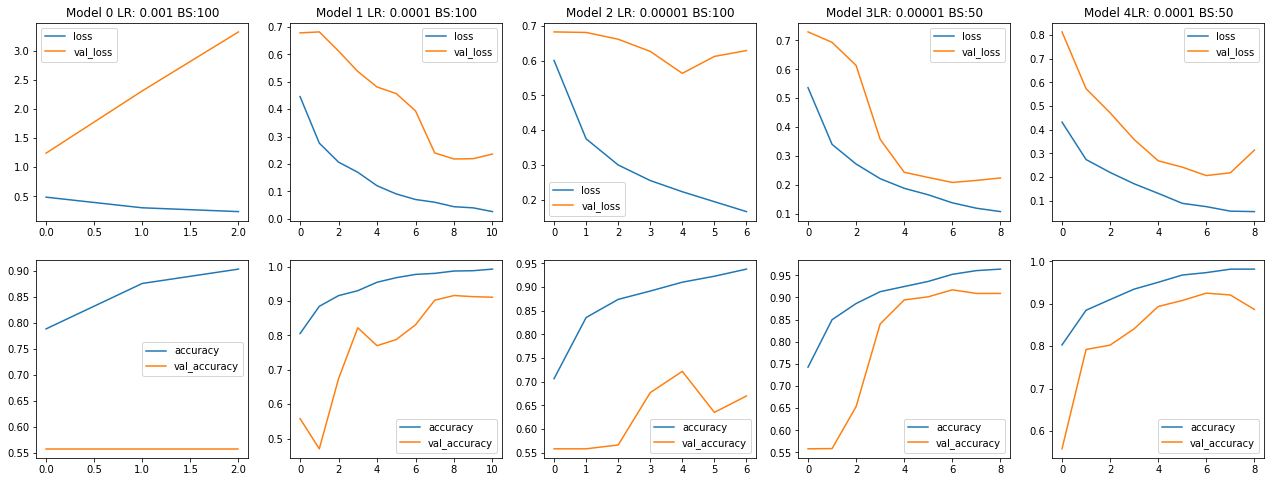

In [ ]:
# Plotting the evolution of the loss function and accuracy for the training and validation data
fig, ax = plt.subplots(2, 5, figsize=(22, 8))
es_monitor_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0][0])
es_monitor_1_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0][1])
es_monitor_2_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0][2])
es_monitor_3_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0][3])
es_monitor_4_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0][4])
es_monitor_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1][0]);
es_monitor_1_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1][1]);
es_monitor_2_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1][2]);
es_monitor_3_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1][3]);
es_monitor_4_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1][4]);
ax[0][0].title.set_text('Model 0 Learning Rate: 0.001 Batch Size:100')
ax[0][1].title.set_text('Model 1 Learning Rate: 0.0001 Batch Size:100')
ax[0][2].title.set_text('Model 2 Learning Rate: 0.00001 Batch Size:100')
ax[0][3].title.set_text('Model 3 Learning Rate: 0.00001 Batch SizeS:50')
ax[0][4].title.set_text('Model 4 Learning Rate: 0.0001 BS:50')
plt.show() #LR is Learning Rate and BS is Batch Size

It is possible to note that the reduction of both learning rate and batch size decreased the loss function and increased accuracy.

In [ ]:
# Predicting the values for all the data
y_pred = model_4.predict(X)
y_train_pred = model_4.predict(X_train)
y_val_pred = model_4.predict(X_val)
# Converting values to integer format
y_predict = (np.rint(y_pred)).astype(int)
y_train_predict = (np.rint(y_train_pred)).astype(int)
y_val_predict = (np.rint(y_val_pred)).astype(int)
y_predict

58/58 [==============================] - 0s 4ms/step


array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
pd.DataFrame(y_predict).value_counts(), pd.DataFrame(y_train_predict).value_counts(), pd.DataFrame(y_val_predict).value_counts()

(0    5046
 1    4174
 dtype: int64, 0    4037
 1    3339
 dtype: int64, 0    1009
 1     835
 dtype: int64)

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y, y_predict))
print(confusion_matrix(y_train, y_train_predict))
print(confusion_matrix(y_val, y_val_predict))

[[4945  113]
 [ 101 4061]]
[[3995   34]
 [  42 3305]]
[[950  79]
 [ 59 756]]



# Validate the model

## Predicting The Output For Testing Dataset 



## Loading and preparing test data

In [ ]:
start_time = datetime.now()

labels = pd.read_csv("/content/drive/MyDrive/eye_gender_data/Testing_set.csv")   # Loading the labels
file_paths = [[fname, '/content/drive/MyDrive/eye_gender_data/test/' + fname] for fname in labels['filename']]
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
test_data = pd.merge(images, labels, how = 'inner', on = 'filename')

data_sub = []     # Initializing an empty numpy array
image_size = 100      # Image size taken is 100 here
for i in range(len(test_data)):
  img_array = cv2.imread(test_data['filepaths'][i], cv2.IMREAD_GRAYSCALE)   # Converting the image to gray scale
  new_img_array = cv2.resize(img_array, (image_size, image_size))      # Resizing the image array
  data_sub.append([new_img_array])

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:02.665334


## Test Data Pre-Processing

In [ ]:
len(data_sub), len(data_sub[0]),  len(data_sub[0][0])

(2305, 1, 100)

In [ ]:
X_data_test = data_sub.copy()

In [ ]:
X_data_test  = pd.DataFrame(X_data_test )
X_data_test , X_data_test.shape

(                                                      0
 0     [[140, 141, 142, 142, 141, 139, 139, 138, 135,...
 1     [[165, 168, 173, 175, 176, 171, 164, 160, 155,...
 2     [[208, 206, 204, 202, 199, 197, 194, 194, 195,...
 3     [[45, 43, 41, 39, 37, 36, 35, 34, 32, 30, 27, ...
 4     [[206, 207, 208, 209, 211, 214, 216, 218, 217,...
 ...                                                 ...
 2300  [[122, 120, 117, 113, 109, 102, 99, 99, 104, 1...
 2301  [[159, 158, 157, 156, 155, 153, 150, 146, 141,...
 2302  [[145, 146, 147, 148, 149, 149, 149, 150, 151,...
 2303  [[183, 183, 183, 181, 181, 181, 183, 184, 185,...
 2304  [[226, 225, 224, 224, 224, 224, 223, 222, 220,...
 
 [2305 rows x 1 columns], (2305, 1))

In [ ]:
X_test = np.zeros((len(X_data_test [0]), X_data_test [0][0].shape[0], X_data_test [0][0].shape[1]))

for i, img in enumerate(X_data_test [0]):
    X_test[i, : , :] = img

In [ ]:
X_test.shape #Checking the shape of the data

(2305, 100, 100)

In [ ]:
X_test

array([[[140., 141., 142., ..., 169., 171., 173.],
        [138., 138., 138., ..., 166., 168., 170.],
        [137., 135., 134., ..., 163., 164., 166.],
        ...,
        [146., 150., 155., ..., 151., 151., 151.],
        [146., 151., 157., ..., 148., 147., 146.],
        [147., 152., 158., ..., 147., 145., 143.]],

       [[165., 168., 173., ...,  93.,  89.,  87.],
        [160., 163., 169., ...,  89.,  86.,  84.],
        [153., 156., 162., ...,  83.,  80.,  78.],
        ...,
        [111., 113., 116., ..., 122., 120., 119.],
        [111., 112., 115., ..., 125., 122., 121.],
        [110., 112., 115., ..., 127., 124., 122.]],

       [[208., 206., 204., ..., 184., 186., 187.],
        [207., 206., 204., ..., 182., 184., 185.],
        [206., 206., 204., ..., 179., 181., 181.],
        ...,
        [211., 212., 214., ..., 222., 222., 222.],
        [210., 212., 214., ..., 221., 221., 221.],
        [210., 211., 214., ..., 221., 221., 221.]],

       ...,

       [[145., 146., 147

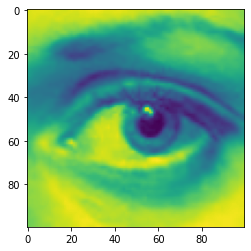

In [ ]:
# Displaying an image from the dataset
plt.imshow(X_test[6])
plt.show()

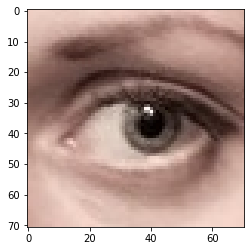

In [ ]:
import matplotlib.pyplot as plt # to visualise
# Displaying an image from the file
img_bgr = cv2.imread('/content/drive/MyDrive/eye_gender_data/test/Image_7.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [ ]:
# Normalizing the data
X_test_norm = X_test/255
X_test_norm

array([[[0.54901961, 0.55294118, 0.55686275, ..., 0.6627451 ,
         0.67058824, 0.67843137],
        [0.54117647, 0.54117647, 0.54117647, ..., 0.65098039,
         0.65882353, 0.66666667],
        [0.5372549 , 0.52941176, 0.5254902 , ..., 0.63921569,
         0.64313725, 0.65098039],
        ...,
        [0.57254902, 0.58823529, 0.60784314, ..., 0.59215686,
         0.59215686, 0.59215686],
        [0.57254902, 0.59215686, 0.61568627, ..., 0.58039216,
         0.57647059, 0.57254902],
        [0.57647059, 0.59607843, 0.61960784, ..., 0.57647059,
         0.56862745, 0.56078431]],

       [[0.64705882, 0.65882353, 0.67843137, ..., 0.36470588,
         0.34901961, 0.34117647],
        [0.62745098, 0.63921569, 0.6627451 , ..., 0.34901961,
         0.3372549 , 0.32941176],
        [0.6       , 0.61176471, 0.63529412, ..., 0.3254902 ,
         0.31372549, 0.30588235],
        ...,
        [0.43529412, 0.44313725, 0.45490196, ..., 0.47843137,
         0.47058824, 0.46666667],
        [0.4

In [ ]:
X_test_norm = X_test_norm.reshape(2305, 100, 100, 1)n # Reshaping the data
X_test_norm.shape

(2305, 100, 100, 1)

## Making Prediction on Test Dataset


In [ ]:
# Predicting the values for the X_test
y_test_pred = model_4.predict(X_test_norm)
y_test_pred

73/73 [==============================] - 0s 4ms/step


array([[0.00010052],
       [0.00178963],
       [0.05614087],
       ...,
       [0.00458177],
       [0.00055945],
       [0.03028252]], dtype=float32)

In [ ]:
# Converting values to integer format
y_test_predict = (np.rint(y_test_pred)).astype(int)
y_test_predict

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
predictions = pd.DataFrame(y_test_predict)
predictions

,0
0,0
1,0
2,0
3,0
4,0
...,...
2300,1
2301,1
2302,0
2303,0


In [ ]:
predictions.value_counts()

0    1230
1    1075
dtype: int64

In [ ]:
# Creating a new column to transform the categorical output in numerical values (male = 0 female = 1)
predictions['label'] = predictions[0].apply(lambda x: 'female' if x == 1 else 'male')
predictions

,0,label
0,0,male
1,0,male
2,0,male
3,0,male
4,0,male
...,...,...
2300,1,female
2301,1,female
2302,0,male
2303,0,male


In [ ]:
test_predictions = predictions.drop(0, axis = 1)
test_predictions

,label
0,male
1,male
2,male
3,male
4,male
...,...
2300,female
2301,female
2302,male
2303,male


## Saving the Test predictions locally via colab notebook


In [ ]:
test_predictions.to_csv("/content/drive/MyDrive/submission.csv", index = False) 

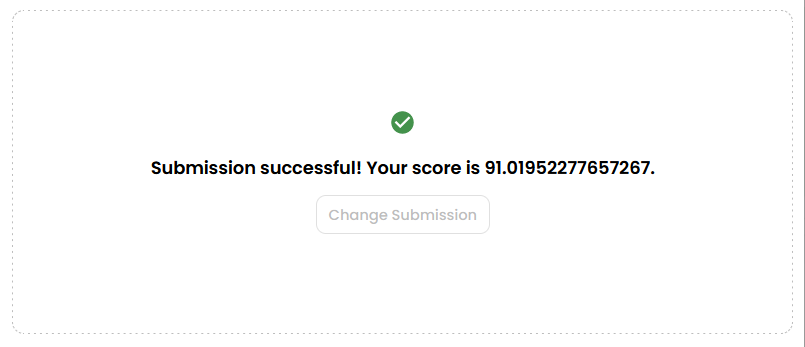